<center> Assignment 02 </center>

<center> 陈禹凡 12232261 </center>

## 1. Significant earthquakes since 2150 B.C.

In [1]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1.1 Compute the total number of deaths

In [2]:
#读取所下载的数据
Sig_Eqs = pd.read_csv("earthquakes-2022-10-19_11-14-52_+0800.tsv",'\t',na_values=[' '])

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Sig_Eqs

,Year,Mo,Dy,Hr,Mn,Sec,Country,Area,Region,Location Name,Ms,Deaths
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2150.0,NaN,NaN,NaN,NaN,0.0,JORDAN,NaN,140.0,"JORDAN: BAB-A-DARAA,AL-KARAK",NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,SYRIA,NaN,130.0,SYRIA: UGARIT,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,NaN,40.0,TURKMENISTAN: W,7.1,1.0
4,-1610.0,NaN,NaN,NaN,NaN,NaN,GREECE,NaN,130.0,GREECE: THERA ISLAND (SANTORINI),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6333,2022.0,9.0,19.0,18.0,5.0,6.0,MEXICO,NaN,150.0,"MEXICO: MICHOACAN, COLIMA, JALISCO",NaN,2.0
6334,2022.0,9.0,22.0,6.0,16.0,9.0,MEXICO,NaN,150.0,"MEXICO: MEXICO CITY, MICHOACAN",NaN,2.0
6335,2022.0,9.0,30.0,19.0,28.0,40.0,INDONESIA,NaN,60.0,INDONESIA: SUMATRA,NaN,1.0
6336,2022.0,10.0,5.0,0.0,21.0,29.0,IRAN,NaN,140.0,IRAN: KHOY; WEST AZERBAIJAN,NaN,NaN


In [4]:
print('The top 20 countries along with the total number of deaths are listed:')
#将Deaths和Country两列数据挑选出来，并对相同国家的Death求和，并进行排序，取前20.
Sig_Eqs_Deaths = Sig_Eqs['Deaths'].groupby(Sig_Eqs['Country']).sum().sort_values(ascending=False).head(20)
#将Sig_Eqs_Deaths里的数据，进行导出
for i in range(20):
    print(i+1,' ',Sig_Eqs_Deaths.index[i],'; The number of deaths:',int(Sig_Eqs_Deaths.values[i]))

The top 20 countries along with the total number of deaths are listed:
1   CHINA ; The number of deaths: 2075019
2   TURKEY ; The number of deaths: 1134569
3   IRAN ; The number of deaths: 1011446
4   ITALY ; The number of deaths: 498477
5   SYRIA ; The number of deaths: 439224
6   HAITI ; The number of deaths: 323474
7   AZERBAIJAN ; The number of deaths: 317219
8   JAPAN ; The number of deaths: 278142
9   ARMENIA ; The number of deaths: 191890
10   PAKISTAN ; The number of deaths: 145083
11   IRAQ ; The number of deaths: 136200
12   ECUADOR ; The number of deaths: 135479
13   TURKMENISTAN ; The number of deaths: 117412
14   PERU ; The number of deaths: 102219
15   ISRAEL ; The number of deaths: 90388
16   PORTUGAL ; The number of deaths: 83531
17   GREECE ; The number of deaths: 79174
18   CHILE ; The number of deaths: 64276
19   INDIA ; The number of deaths: 63491
20   TAIWAN ; The number of deaths: 57135


### 1.2 Compute the total number of earthquakes

<AxesSubplot:title={'center':'The total number of earthquakes with magnitude larger than 3.0 (Ms) worldwide each year'}, xlabel='Year', ylabel='Times'>

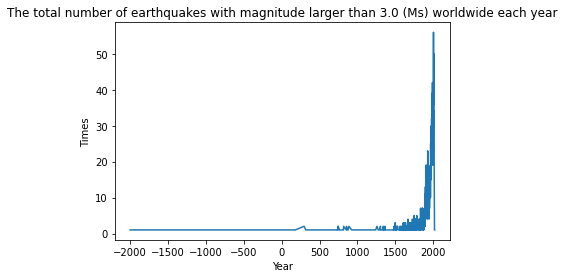

In [5]:
#挑选出地震震级Ms>3的数据
Sig_Eqs_Ms = Sig_Eqs[Sig_Eqs['Ms'] > 3 ]
#将震级Ms>3的数据按年进行统计计数，绘制成图
Sig_Eqs_Ms['Ms'].groupby(Sig_Eqs_Ms['Year']).count().plot(ylabel = 'Times',
                title = 'The total number of earthquakes with magnitude larger than 3.0 (Ms) worldwide each year')

#### 趋势：在大约1500年之前，全球地震（>3级）的次数较少；在1500年之后，全球地震（>3级）的次数急剧上升增多。
#### 原因：在1500年之前所记录的地震数据较少，没有统计。越靠近现代，地震会被更容易记录，流传下来。

### 1.3 CountEq_LargestEq

In [6]:
#定义一个CountEq_LargestEq函数
def CountEq_LargestEq(country):
    #将每个国家地震总数统计出来
    total_earthquakes = Sig_Eqs['Year'].groupby(Sig_Eqs['Country']).count()
    #挑选出每个国家生最大地震的数据
    largest_earth = Sig_Eqs['Ms'].groupby(Sig_Eqs['Country']).max()#只含有国家和最大地震两项数据，没有日期地点
    #c为将largest_earth找到的数据带回原本的大数据中，获得每个国家生最大地震的全部数据（日期地点等）
    c = (Sig_Eqs.loc[(Sig_Eqs['Country'] == country) & (Sig_Eqs['Ms'] == largest_earth[country])])#判断是否为最大地震
    #判断c是否有符合条件的数据,不符合的赋予NaN
    if (len(c) != 0):
        c = c[0:1] #若有多个最大地震数据，选择第一个
    #将日期转化为xxxx-xx-xx格式
        date = str(int(c['Year']))+'-'+('00' if np.isnan(c['Mo'].values) else str(int(c['Mo'])).zfill(2))+'-'+\
        ('00' if np.isnan(c['Ms'].values) else str(int(c['Ms'])).zfill(2))
    #将地点转化为字符串格式导出
        loacation_1 = list(c['Location Name'])
        loacation_2 = map(str,loacation_1)
        loacation = ' '.join(loacation_2)
    else:
        date = 'NaN'
        loacation = 'NaN'
    return int(total_earthquakes.loc[country]),date,loacation
CountEq_LargestEq('CHINA')#举例

(616, '1920-12-08', 'CHINA:  GANSU PROVINCE, SHANXI PROVINCE')

In [7]:
#将数据中所有国家不重复提取出来成列表
country_list = Sig_Eqs['Country'].unique()
#生成一个data_count的DataFrame文件，其索引为每个国家
data_count = pd.DataFrame(index=country_list[1:] )                      
#循环将每个国家数据存入data_count中
for country in country_list[1:]:
    data_count.loc[country,['The total number of earthquakes','Date of the largest earthquake',
                            'Location area of the largest earthquake']] = CountEq_LargestEq(country)
data_count.sort_values('The total number of earthquakes',ascending=False)

,The total number of earthquakes,Date of the largest earthquake,Location area of the largest earthquake
CHINA,616.0,1920-12-08,"CHINA: GANSU PROVINCE, SHANXI PROVINCE"
JAPAN,411.0,869-07-08,JAPAN: SANRIKU
INDONESIA,405.0,2004-12-08,INDONESIA: SUMATRA: ACEH: OFF WEST COAST
IRAN,384.0,856-12-07,"IRAN: DAMGHAN, QUMIS"
TURKEY,332.0,1916-01-07,TURKEY
...,...,...,...
NORWAY,1.0,1819-08-05,NORWAY: RANA REGION: LUROY
CENTRAL AFRICAN REPUBLIC,1.0,NaN,NaN
PALAU,1.0,1914-10-07,"MICRONESIA, FED. STATES OF: CAROLINE ISLANDS"
KIRIBATI,1.0,NaN,NaN


## 2. Air temperature in Shenzhen during the past 25 years

In [8]:
#读取所下载的数据
Baoan_Weather = pd.read_csv("Baoan_Weather_1998_2022.csv")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12752\2801096616.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Baoan_Weather = pd.read_csv("Baoan_Weather_1998_2022.csv")


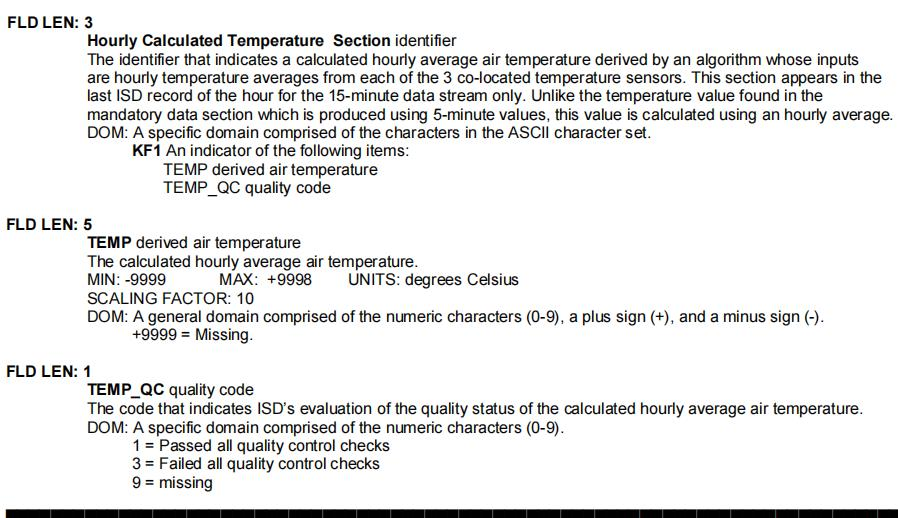
<center> 图 1 </center>

#### 通过阅读说明书，我们可以找到图1所示的数据说明，我们可以知道TMP数据是由+XXXX,Y组成，XXX=温度*10（因为比例因子SCALING FACTOR = 10），Y的1表示质量过检。因此只要筛选出XXXX后三个X即可。

<AxesSubplot:title={'center':'The monthly averaged air temperature against the observation time in Shenzhen'}, xlabel='Times', ylabel='Tempereture (℃)'>

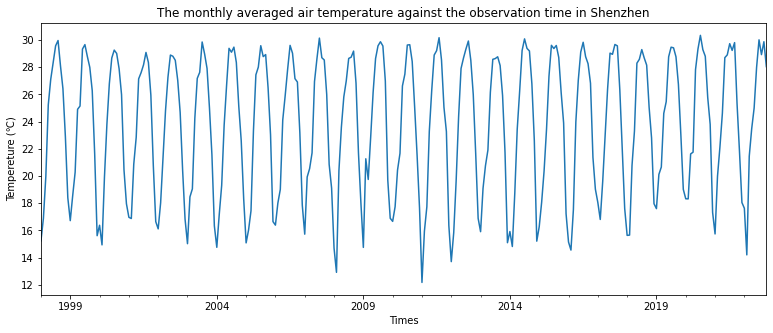

In [9]:
#提取出原文件中的日期和温度两个数据成data_tmp
data_tmp =Baoan_Weather.loc[:,['DATE','TMP']]
#将TMP有用数据提取出来（XXX三位数）
for i in range(len(data_tmp)):
    data_tmp.iloc[i,1] = int(data_tmp['TMP'][i][1:5])
#将提取出来的TMP数据（XXX），检查是否有异常值，并将其除以10转化为温度
tmp = data_tmp['TMP'].values
tmp[tmp==9999] = np.nan #异常值
tmp = tmp/10
data_tmp['TMP'] = tmp
#运用to_datetime函数将时间格式变为xxxx-xx-xx xx:xx:xx,如1998-01-01 00:00:00
#该公式在课上Section 06看到，具体使用在百度查阅
data_tmp['DATE'] = pd.to_datetime(data_tmp['DATE'])
#将index赋予DATA值，方便接下来resample函数的使用，rename通过百度查到
data_tmp.rename(index = data_tmp['DATE'],inplace=True)
#通过resample函数（百度所查到）实现对每月（M）的重采样
data_tmp.resample('M').mean()['TMP'].plot(xlabel = 'Times',
                                          ylabel = 'Tempereture (℃)',yticks = (range(12, 31,2)),figsize=(13,5),
                                         title = 'The monthly averaged air temperature against the observation time in Shenzhen')


#### 月平均气温趋势：月平均气温在每年年初（1月）会逐渐增高，在中旬（7.8月）达到最大值后会开始降低，这种规律的变化与气候季节性有关。
#### 总的来说，每年的月平均气温总体走势一致（个别年份有所小波动），最高温波动不大（维持在29-30℃），最低气温有所起伏，在2012年年初月均温有最低值（12°左右）。

## 3. Global collection of hurricanes

### 3.1 

In [10]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),# 读1-17列的第一行的名字
                 skiprows=[1, 1], #跳过第二行
                 parse_dates=['ISO_TIME'],#解析日期格式
                 na_values=['NOT_NAMED', 'NAME',' '])#将'NOT_NAMED', 'NAME'和没有数据的地方改写为NaN
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12752\2954686795.py:1: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN,NaN,main,43,0.0,__________O___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707172,2022284N16268,2022,79,NaN,GM,KARL,2022-10-12 21:00:00,TS,22.2799,-94.3074,NaN,NaN,NaN,PROVISIONAL,319,319.0,P_____________
707173,2022284N16268,2022,79,NaN,GM,KARL,2022-10-13 00:00:00,TS,22.4000,-94.2333,NaN,NaN,NaN,PROVISIONAL,331,NaN,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.2000,151.3000,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.0500,151.3250,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


In [11]:
#将"NAME","SID","WMO_WIND"单独提取出来
df_1 = df.loc[:,["NAME","SID","WMO_WIND"]]
#按WMO_WIND进行分组
df_2 = df_1.groupby(['SID','NAME']).max().sort_values('WMO_WIND', ascending=False)
#取前十
df_2.head(10)

,,WMO_WIND
SID,NAME,
2015293N13266,PATRICIA,185.0
1980214N11330,ALLEN,165.0
1988253N12306,GILBERT,160.0
2005289N18282,WILMA,160.0
1997253N12255,LINDA,160.0
2019236N10314,DORIAN,160.0
2009288N07267,RICK,155.0
2017242N16333,IRMA,155.0
2005261N21290,RITA,155.0


### 3.2

<AxesSubplot:title={'center':'Yhe wind speed (WMO_WIND) of the 20 strongest-wind hurricanes'}, xlabel='SID,NAME'>

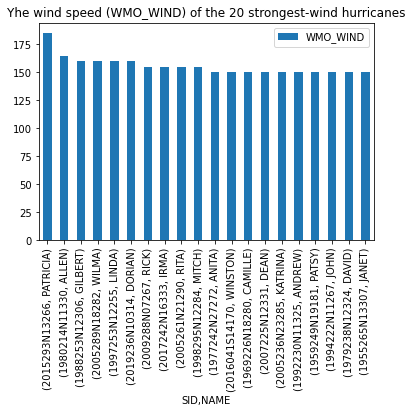

In [12]:
#通过第一问可直接得到：
df_2.head(20).plot(kind='bar',title = 'Yhe wind speed (WMO_WIND) of the 20 strongest-wind hurricanes')

### 3.3 

Text(0, 0.5, 'Count')

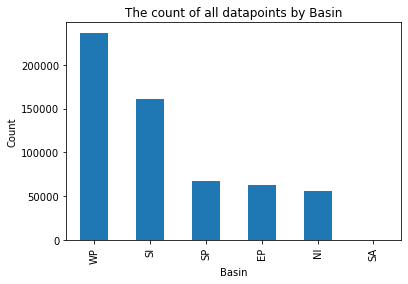

In [13]:
df['BASIN'].value_counts().plot(kind='bar')
plt.title('The count of all datapoints by Basin')
plt.xlabel('Basin')
plt.ylabel('Count')

### 3.4 

In [14]:
import matplotlib.pyplot as plt 
import numpy as np 

Text(0, 0.5, 'Latitude')

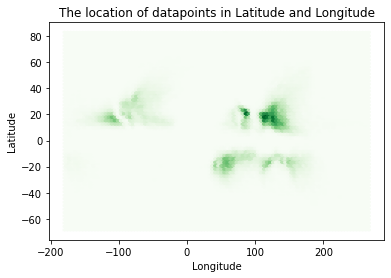

In [15]:
#根据经纬度画图
plt.hexbin(x=df['LON'], y=df['LAT'], gridsize = 100, cmap ='Greens')
plt.title('The location of datapoints in Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### 3.5

Text(0, 0.5, 'Latitude')

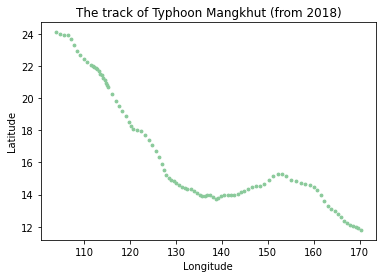

In [16]:
#挑选出2018年山竹台风数据
shanzhu_data = df[(df['NAME']== 'MANGKHUT') & (df['SEASON']== 2018)]
#给x,y赋值（经纬度）
x = np.array(shanzhu_data['LON'].tolist())
y = np.array(shanzhu_data['LAT'].tolist())
#美化图
plt.scatter(x,y,s=8, c = '#88c999')
plt.title('The track of Typhoon Mangkhut (from 2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### 3.6 

In [17]:
#挑选出符合题意的数据
filtered_data = df[(df['SEASON'] >= 1970)&((df['BASIN']== 'WP')|(df['BASIN']== 'EP'))]
filtered_data

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,NaN,NaN,PROVISIONAL,0,0.0,P_____________
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,NaN,NaN,PROVISIONAL,0,NaN,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


### 3.7

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12752\522621817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Count'] = 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12752\522621817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(index = filtered_data['ISO_TIME'],inplace=True)


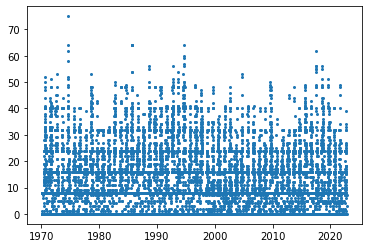

In [18]:
#新插入一行全都为1，用于后面计数
filtered_data['Count'] = 1
#将index赋予时间值，方便接下来resample函数的使用
filtered_data.rename(index = filtered_data['ISO_TIME'],inplace=True)
#通过resample函数实现对每天（D）的重采样，并对Count计数
per_data = filtered_data.resample('D').count()['Count']
#作图
plt.plot_date(per_data.index,per_data, markersize = 2)

### 3.8 

In [19]:
#定义一个函数，该函数将一年的第某天转为日期形式,具体来自百度
def trans_date(year,day):
    first_day = datetime.datetime (year,1,1) #一年的开始
    zone = datetime.timedelta(days=day-1)#该天为一年的第n-1天
    return datetime.datetime.strftime(first_day + zone, "%Y-%m-%d")#第一天+第n-1天，再转化为日期
#定义day_of_year函数，用于计算1970-2022年所有第n天中，台风发生次数总和
def day_of_year(day):
    sum_day = 0 #初始定义一个用于计算总天数的参数
    t = 0 #用于计算1970 - 2022共有多少个第n天
    temp_date = 0
    for i in range (1970,2023):
        year = i
        temp_date = trans_date(year,day) #将天数转化为日期
        if (temp_date in per_data.index): #看当年日期在per_data（索引）是否有
            sum_day = sum_day+ per_data[temp_date]
            t = t + 1
    return sum_day,t
day_of_year(1)

(83, 52)

### 3.9

In [20]:
average_day = []#1970-2022平均每天台风数
for i in range(0,366):
    average_day.append(day_of_year(i)[0]/day_of_year(i)[1])#一天总数/总天数
def trans_date(date):
    temp_date = date.timetuple() #将日期格式解析字段
    day = temp_date.tm_yday #找到tm_yday为第n天
    return day
ano_data = pd.DataFrame(columns = ['Anomaly'])#用于存储每天异常数据
#将每天的异常数据存储到ano_data中
for i in range(len(per_data.index)):
    ano_data.loc[per_data.index[i],['Anomaly']] = per_data[i]-average_day[int(trans_date(per_data.index[i])-1)]


### 3.10

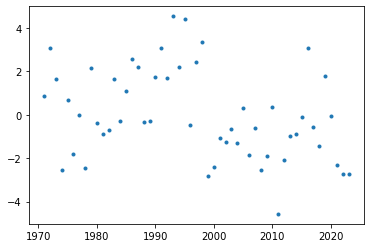

In [21]:
#以年频率作图作图
ano_data_Y = ano_data.resample('Y').mean()['Anomaly']
plt.plot_date(ano_data_Y.index,ano_data_Y,markersize = 3)

#### 分析：从图中我们可以看出，年均异常值分布不均匀，没有大致的规律，但在1992,1994和2010这三年异常值的绝对值均大于4.因此在这三年可能出现了异常台风活动。

## 4. Explore a data set

### 4.1

In [22]:
#该数据来源National Centers for Environmental Information (NCEI) ，为北京地区数据，含有温度，降水等数据
#将所有空值赋予NaN
#因为网站中并未找到数据异常值的表达，因此省略该步骤
Beijing_Data = pd.read_csv("Beijing data.csv",parse_dates=['Date'],na_values=[' '])
Beijing_Data

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
0,1951-01-01,NaN,25.0,7.0,0.00,NaN,NaN
1,1951-01-02,20.0,30.0,14.0,0.02,NaN,NaN
2,1951-01-03,18.0,25.0,11.0,0.00,NaN,NaN
3,1951-01-04,19.0,23.0,14.0,0.05,NaN,NaN
4,1951-01-05,16.0,20.0,13.0,0.18,NaN,NaN
...,...,...,...,...,...,...,...
26218,2022-10-16,57.0,76.0,NaN,0.00,NaN,NaN
26219,2022-10-17,48.0,67.0,NaN,0.00,NaN,NaN
26220,2022-10-18,47.0,67.0,NaN,0.00,NaN,NaN
26221,2022-10-19,53.0,70.0,35.0,0.00,NaN,NaN


### 4.2

<AxesSubplot:title={'center':'The Precipitation of Beijing between 1951 - 2022'}, xlabel='Times', ylabel='Precipitation (IN)'>

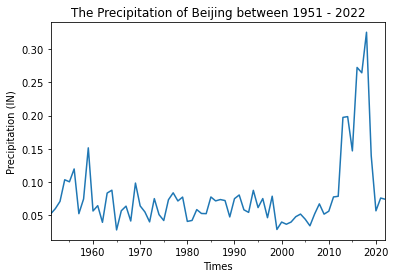

In [23]:
#绘制1951-2022年年平均降水量图
Beijing_Data.rename(index = Beijing_Data['Date'],inplace=True)
Beijing_Data.resample('Y').mean()['PRCP (Inches)'].plot(title = 'The Precipitation of Beijing between 1951 - 2022',
                                                        xlabel = 'Times',ylabel = 'Precipitation (IN)')

### 4.3

In [24]:
a = Beijing_Data.mean()['PRCP (Inches)'] #日平均降水量
Beijing_Data['Year'] = pd.to_datetime(Beijing_Data['Date']).dt.year
b = Beijing_Data.groupby(['Year']).mean()['PRCP (Inches)'].mean() #年平均降水量
c = Beijing_Data.groupby(['Year']).mean()['PRCP (Inches)'].max() #年最大降水量
d = Beijing_Data.groupby(['Year']).mean()['PRCP (Inches)'].var() #均方差
print('The mean value of the precipitation in Beijing between 1951 - 2022 per day is',round(a,4),'in/d.')
print('The mean value of the precipitation in Beijing between 1951 - 2022 per year is',round(b,4),'in/a.')
print('The max year of the precipitation in Beijing between 1951 - 2022 is',round(c,4),'in/a.')
print('The unbiased variance of the precipitation in Beijing between 1951 - 2022 per year is',round(d,4),'in/a.')
#执行Shapiro-Wilk 正态性检验
from scipy import stats
s,p=stats.shapiro(Beijing_Data.resample('Y').mean()['PRCP (Inches)'])
#返回值s为检验统计量，当p值大于指定的显著性水平(0.5)，则成立
print('s =', round(s,2),';p =', round(p,2),'<0.5.',
      'The annual precipitation data do not conform to the normal distribution.')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12752\1824308095.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  a = Beijing_Data.mean()['PRCP (Inches)'] #日平均降水量


The mean value of the precipitation in Beijing between 1951 - 2022 per day is 0.0687 in/d.
The mean value of the precipitation in Beijing between 1951 - 2022 per year is 0.0793 in/a.
The max year of the precipitation in Beijing between 1951 - 2022 is 0.3254 in/a.
The unbiased variance of the precipitation in Beijing between 1951 - 2022 per year is 0.003 in/a.
s = 0.67 ;p = 0.0 <0.5. The annual precipitation data do not conform to the normal distribution.


#### 从年均降水量和日均降水量我们可以发现，年均降水量明显要大于日降水量。
#### 并且从4.2图和所计算的均方差我们也能看到，年均降水量在2010年之前相对稳定，但在2010年之后有急剧上升趋势。
#### 通过Shapiro-Wilk 正态性检验，年均降水量不符合正态分布。